In [9]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TRAIN_DIR = '../data/processed/stage3_classifier/train'
VAL_DIR = '../data/processed/stage3_classifier/val'

def count_classes(directory, split_name):
    class_counts = {}
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return pd.DataFrame()
        
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            # Sadece resim dosyalarını say
            count = len(glob.glob(os.path.join(class_path, '*.*')))
            class_counts[class_name] = count
            
    df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
    df['Split'] = split_name
    return df

In [10]:
# Sayım işlemi
train_df = count_classes(TRAIN_DIR, 'Train')
val_df = count_classes(VAL_DIR, 'Validation')

# Birleştir
full_df = pd.concat([train_df, val_df], ignore_index=True)
print("Sınıf Dağılımı:")
print(full_df)

Sınıf Dağılımı:
               Class  Count       Split
0        Deep_Caries   1000       Train
1            Healthy   3171       Train
2  Periapical_Lesion   1000       Train
3             Caries   2189       Train
4           Impacted   1000       Train
5        Deep_Caries     32  Validation
6            Healthy    222  Validation
7  Periapical_Lesion      9  Validation
8             Caries    101  Validation
9           Impacted     40  Validation


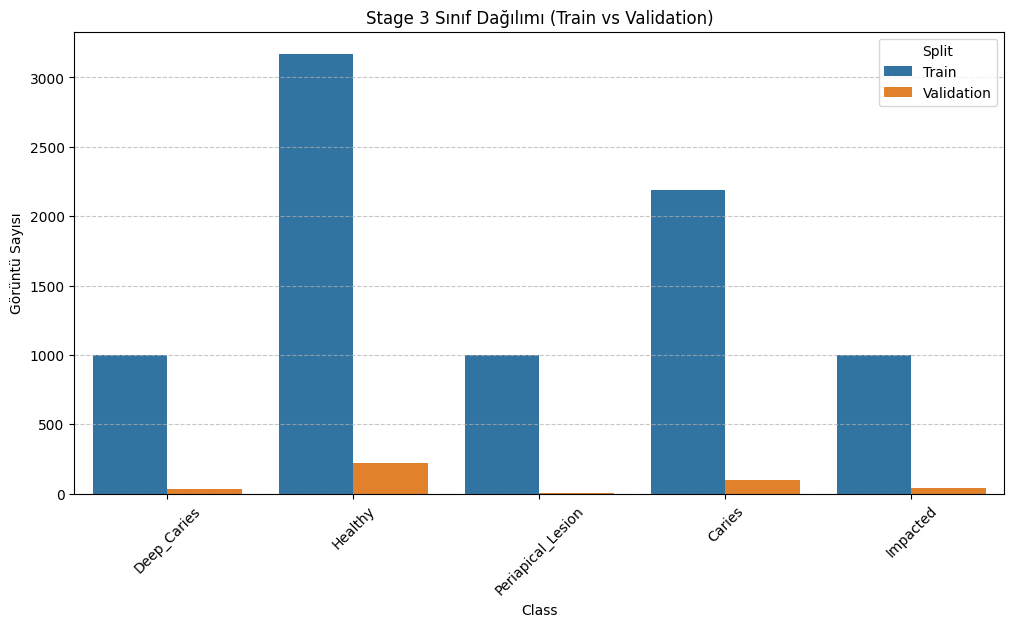

In [12]:
# Grafik Çizimi
plt.figure(figsize=(12, 6))
sns.barplot(data=full_df, x='Class', y='Count', hue='Split')
plt.title('Stage 3 Sınıf Dağılımı (Train vs Validation)')
plt.xticks(rotation=45)
plt.ylabel('Görüntü Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# Dengesizlik Analizi
if not train_df.empty:
    total_train = train_df['Count'].sum()
    train_df['Ratio'] = train_df['Count'] / total_train
    
    print("\nEğitim Seti Oranları:")
    print(train_df[['Class', 'Count', 'Ratio']].sort_values(by='Ratio', ascending=False))
    
    max_ratio = train_df['Ratio'].max()
    min_ratio = train_df['Ratio'].min()
    
    if max_ratio > min_ratio * 5:
        print(f"\n⚠️ CİDDİ DENGESİZLİK TESPİT EDİLDİ!")
        print(f"En çok bulunan sınıf, en az bulunan sınıftan {max_ratio/min_ratio:.1f} kat daha fazla.")
    else:
        print("\nVeri seti nispeten dengeli görünüyor.")


Eğitim Seti Oranları:
               Class  Count     Ratio
1            Healthy   3171  0.379306
3             Caries   2189  0.261842
0        Deep_Caries   1000  0.119617
2  Periapical_Lesion   1000  0.119617
4           Impacted   1000  0.119617

Veri seti nispeten dengeli görünüyor.
